<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">Unsupervised ML Modelle: Dimensionsreduzierung (Downprojection)</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

## Downprojection von Daten

Die **Downprojection** (oder Dimensionalitätsreduktion) ist ein Verfahren, um hochdimensionale Daten in eine niedrigere Dimension zu verwandeln (zbsp durch eine Projektion), während wichtige Strukturen und Muster erhalten bleiben (sollen). Dies erleichtert Visualisierungen, reduziert Speicherbedarf und verbessert oft die Effizienz von Machine-Learning-Algorithmen.

![Dim_Reduction_Cubes](../resources/Dim_Reduction_Cubes.jpeg)

(von https://www.sc-best-practices.org/preprocessing_visualization/dimensionality_reduction.html)

![Dim_Reduction_Points](../resources/Dim_Reduction_Points.png)

(von https://blog.roboflow.com/what-is-dimensionality-reduction/)

Wir werden uns nun die beiden wichtigsten Methoden ansehen: **Principal Component Analysis (PCA)** und **t-Distributed Stochastic Neighbour Embedding (t-SNE)**. Neben diesen beiden gibt es noch weitere Methoden, welche auch ihre eigenen Vorteile/Nachteile und Anwendungsfälle besitzen. Darunter gehören zum Beispiel *UMAP (Uniform Manifold Approximation and Projection)*, *MDS (Multidmensional Scaling)* und *LLE (Locally Linear Embedding)*.

## Principal Component Analysis (PCA)

Die **Principal Component Analysis (PCA)** ist ein mathematisches Verfahren, das es uns möglich macht, die Dimension von Daten zu reduzieren. Einfach gesagt sucht man in *PCA* mehr oder weniger eine $n$-dimensionale "Ansicht" der Daten, bei der man möglichst viel sieht ($n$ ist für Visualisierungszwecke gleich 2). Sprich wir schauen uns an, in welche Richtungen die Daten besonders ausgebreitet sind und machen dies zu unseren neuen Achsen. Diese neuen Achsen nennen wir **Principal Components (Hauptkomponenten)**.

**Info:** Wenn wir für $d$-dimensionale Daten eine $d$-dimensionale "Ansicht" suchen, dann bekommen wir die exakt gleichen Daten wieder zurück, jedoch haben jetzt das Koordinatensystem geändert.

**Wichtig:** Die Daten werden beim verwenden von PCA nicht verändert, es wird nur das Koordinatensystem gedreht.

**Info:** Wenn wir für $d$-dimensionale Daten zum Beispiel die beste "Ansicht" mit Dimension $2$ finden wollen, dann passiert dies, indem wir zuerst PCA anwenden, um $d$ neue Achsen zu bekommen. Anschließend wählen wir die ersten beiden Achsen aus.

**Info:** Die neuen Richtungen, in welche sich die Daten am meisten Ausbreiten sind orthogonal (=rechtwinklig) zueinander.

**Wichtig:** Bei jeder Dimensionsreduzierung gehen auch Daten verloren. Also die von uns betrachteten Methoden sind (normalerweise) nicht **verlustfrei**, auch *lossless* genannt.

![PCA_2_Plots](../resources/PCA_2_Datasets.png)

(von Unsupervised Techniques, Prof. Hochreiter; JKU)

### Beschreibung des Algorithmus

Der *PCA* Algorithmus arbeitet folgende Schritt ab.

1. **Zentrieren der Daten:** Subtrahiere den Mittelwert jeder Dimension. Somit ist der Mittelwert des Datasets $0$ in jeder Dimension.
2. **Bestimmen der Principal Components:** Bestimme die Richtungen/Achsen, in welche die Daten sich am meisten Ausbreiten und ordne diese absteigend.
3. **Hauptkomponentenauswahl:** Wähle die wichtigsten $n$ Richtungen (somit die ersten $n$ Richtungen der Daten mit neuem Koordinatensystem) aus.
4. **Transformation:** Projiziere die Daten auf diese Richtungen.

**Infos:** Der Beitrag pro Richtung zu einem Sample nimmt mit jeder Richtung ab, sprich die letzten Richtungen tragen nur mehr ganz wenig zum Datenpunkt bei im Vergleich zu den anderen Datenpunkten (siehe Referat: Kompression von Daten)

### Hyperparameter von PCA

* **Anzahl der Hauptkomponenten:** Entscheidet, wie viele Dimensionen behalten werden. Kann wie vorher beschrieben auch gleich viele wie vorher sein, dies bedeutet, dass wir nur das Koordinatensystem ändern.

### Vorteile und Nachteile von PCA

**Vorteile:**
* Sehr schnell und effizient für große Datensätze
* Kann auch zur Datenkompression verwendet werden (Beitrag der einzelnen zu einem Datenpunkt absteigend)
* Kann auch verwendet werden, um die Anzahl der Features für ein Model zu verringern. Bsp: Statt 100 Features werden nur 10 Eingangsvariablen (*wichtig:* Hier sind mehrere Features "vermischt"!)

**Nachteile:**
* Nur für lineare Zusammenhänge geeignet
* Die neuen Achsen können schwer interpretierbar sein
* Variablen müssen standardisiert werden, da sonst Achsen mit großer Skalierung dominieren

## PCA in Python

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine, load_iris
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_iris()
X = data.data
y = data.target

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
X = StandardScaler().fit_transform(X)

In [7]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

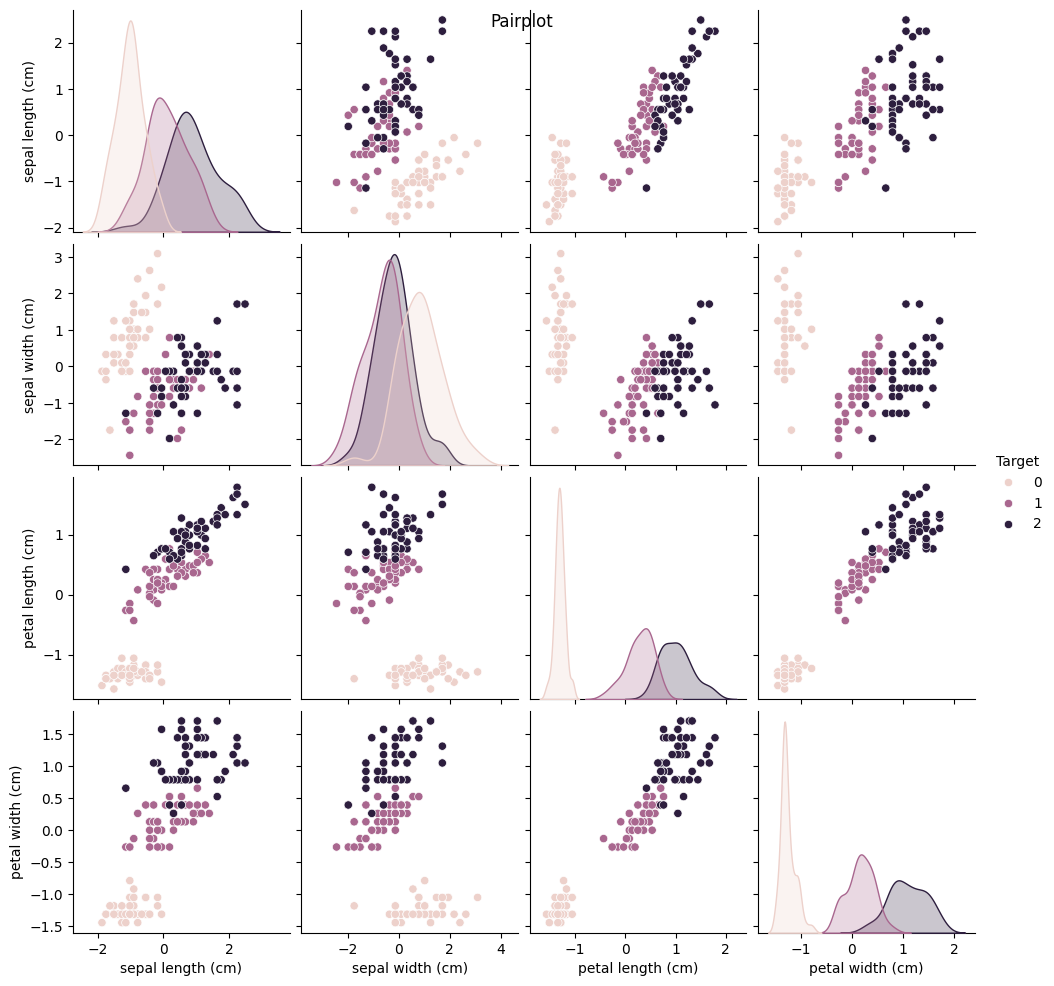

In [8]:
# Pairplot

df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = data.target

sns.pairplot(df, hue='Target')
plt.suptitle('Pairplot')
plt.show()

In [9]:
# Anwenden von PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [10]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

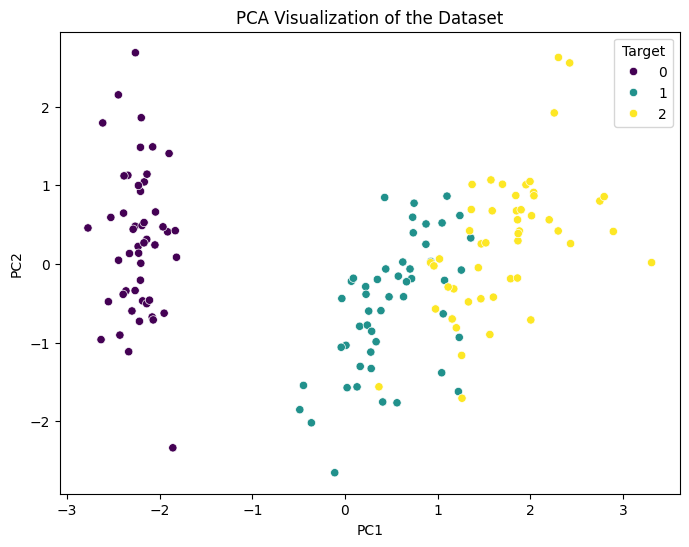

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=df_pca['Target'], palette='viridis', data=df_pca)
plt.title(f'PCA Visualization of the Dataset')
plt.show()

### Hinzufügen eines neuen Datenpunktes in PCA

Hat man nun einen neuen Datenpunkt, so kann dieser auch ganz einfach downprojected werden.

Dafür muss $\ldots$
* $\ldots$ der Datenpunkt die die gleiche Anzahl der Features haben wie die Datenpunkte im Dataset
* $\ldots$ der Datenpunkt auf die gelernten *Principal Components* projeziert werden

In Python funktioniert dies recht einfach

In [12]:
# hinzufügen von einem neuen Punkt in PCA
new_point = [[-2, 0, 1.5, 0.5]]	# 4 features (funktioniert also für Iris dataset)
new_point_pca = pca.transform(new_point)

In [13]:
new_point_pca

array([[ 0.11091608, -0.68462682]])

## t-Distributed Stochastic Neighbour Embedding (t-SNE)

**t-SNE** ist ein Algorithmus zur Reduktion der Dimensionalität, ähnlich wie PCA, aber mit einem anderen Ansatz. Während PCA versucht, die gesamte Struktur der Daten zu erhalten, fokussiert sich t-SNE darauf, die lokalen Zusammenhänge zwischen Datenpunkten beizubehalten. Das bedeutet, dass Punkte, die in der hohen Dimension nah beieinander liegen, auch in der niedrigeren Dimension (z. B. 2d oder 3d) nah beieinander bleiben sollen. 

![tSNE_Example](../resources/tSNE_Example.png)

(von https://rpubs.com/marwahsi/tnse)

### Beschreibung des Algorithmus

**1. Ähnlichkeit in hoher Dimension berechnen**  
t-SNE beginnt damit, Ähnlichkeiten zwischen allen Punkten im hochdimensionalen Raum zu berechnen. Es versucht herauszufinden, welche Punkte „Nachbarn“ sind, also welche Punkte in einem bestimmten Umkreis besonders nahe an einem anderen Punkt liegen.  

**2. Punkte in niedriger Dimension platzieren**  
Dann erzeugt t-SNE eine zufällige Anordnung der Punkte in einem niedrigdimensionalen Raum (zum Beispiel 2d). Anschließend beginnt der eigentliche Optimierungsprozess:  

**3. Anordnung verbessern**  
t-SNE vergleicht die Abstände der Punkte in der niedrigen Dimension mit denen in der hohen Dimension. Falls zwei Punkte in der niedrigen Dimension zu weit voneinander entfernt sind, obwohl sie eigentlich Nachbarn sein sollten, werden sie näher zusammengezogen. Falls zwei Punkte zu nah sind, obwohl sie keine echten Nachbarn waren, werden sie auseinander gedrückt. Das passiert iterativ, bis eine möglichst gute Darstellung entsteht. 

**Info:** Nachdem dieser Vorgang iterativ ist, bricht der Algorithmus nach den gegebenen Iterationen ab. Die Anzahl der Iterationen kann im Konstruktor mitgegeben werden.

### Hyperparameter von t-SNE

1. **Perplexity:**
    * Dieser Wert bestimmt, wie viele Nachbarn t-SNE für jeden Punkt betrachtet.  
    * Eine niedrige Perplexity (z. B. 5) fokussiert stark auf lokale Strukturen. Eine hohe Perplexity (z. B. 50) betrachtet größere Zusammenhänge.  
    * Es gibt leider keinen Wert, der immer funktioniert $\rightarrow$ probieren!

2. **Anzahl der Iterationen**
    * Je länger man t-SNE laufen lässt, desto besser wird die Struktur.
    * Mehr Iterationen benötigen aber auch mehr Rechenleistung und dauern dementsprechend auch länger 

### Vorteile und Nachteile von t-SNE

**Vorteile:**
* Besonders gut für Datenvisualisierung geeignet
* Erhält lokale Strukturen sehr gut
* Kann komplexe nicht-lineare Muster erkennen, zum Beispiel welche, die PCA nicht erkennen kann

**Nachteile:**
* Sehr rechenintensiv im Vergleich zu PCA
* Keine eindeutige Rekonstruktion der Daten möglich
* Sensitiv gegenüber der Wahl der Hyperparameter
* Keine neuen Daten können hinzugefügt werden

### t-SNE in Python

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine, load_iris
from sklearn.preprocessing import StandardScaler

In [15]:
data = load_iris()
X = data.data
y = data.target

In [16]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
X = StandardScaler().fit_transform(X)

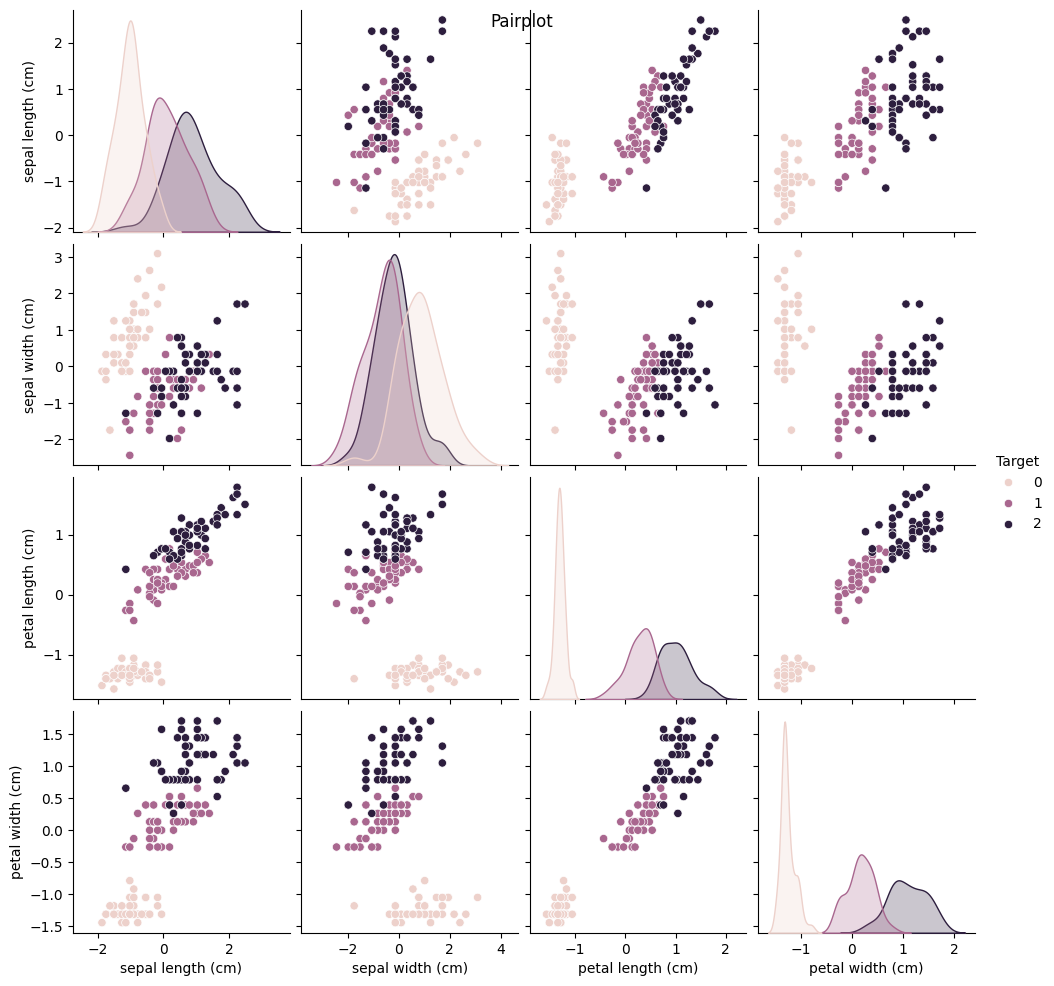

In [19]:
# Pairplot

df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = data.target

sns.pairplot(df, hue='Target')
plt.suptitle('Pairplot')
plt.show()

In [40]:
# Anwenden von t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=25) # Standard Wert für Perplexity ist 30
X_tsne = tsne.fit_transform(X)

In [41]:
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['Target'] = y

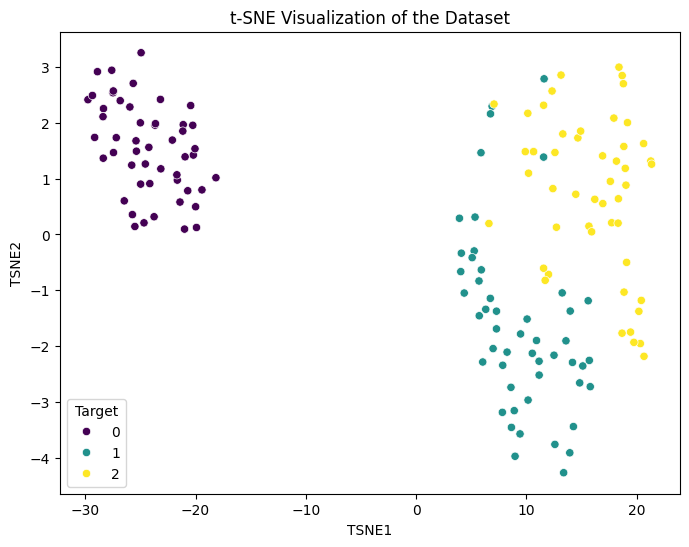

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue=df_tsne['Target'], palette='viridis', data=df_tsne)
plt.title(f't-SNE Visualization of the Dataset')
plt.show()

## Tipps und Tricks zur Dimensions-Reduzierung

* **PCA vor t-SNE:** Eine Voranwendung von PCA kann Rauschen reduzieren und t-SNE effizienter machen.
* **Hyperparameter optimieren:** Die richtige Wahl der Perplexity in t-SNE kann entscheidend sein.
* **Normalisieren/Standardisieren**: Vor allem für PCA sollen die einzelnen Features in der gleichen Größenordnung sein. Ist dies nicht der Fall, kann standardisieren helfen.

## Weitere Methoden (kurzer Überblick)

* **UMAP (Uniform Manifold Approximation and Projection):** Eine moderne Alternative zu t-SNE, die schneller ist und oft besser zwischen globalen und lokalen Strukturen balanciert.
* **MDS (Multidimensional Scaling):** Eine Technik, die Distanzen zwischen Punkten in eine niedrigere Dimension überträgt.
* **LLE (Locally Linear Embedding):** Eine Methode zur Erhaltung lokaler Beziehungen zwischen Datenpunkten.

## Aufgabe 1

Versuche die Aufgabe von letzer Woche zu lösen bzw. die Lösung zu verbessern, indem du zum Beispiel $\ldots$
* $\ldots$ zuerst eine Dimensionsreduzierung anwedest um die Anzahl der Features zu reduzieren
* $\ldots$ danach Dimensionsreduzierung verwendest um die Ergebnisse zu visualisieren
* $\ldots$ nur Dimensionsreduzierungstechniken (auch vielleicht in Kombination -> welche Kombinationen machen zbsp keinen Sinn?) anwendest und dir ansiehst, welche Datenunkte sich ähnlich sein dürften.

**Bisherige Aufgabe:**

* Verwende nun die folgenden Datasets und versuche die Aufgabenstellungen zu beantworten.
* Lade dazu das Dataset mit den bekannten Methoden (Laden mit Hilfe von `pd.read_csv`)
* Verwende für jede Aufgabe eigene Code-Zellen und dokumentiere für die verschiedenen Durchläufe die Ergebnisse


1) HELP International konnte rund 10 Millionen Dollar aufbringen. Nun muss der Geschäftsführer der NRO entscheiden, wie er dieses Geld strategisch und effektiv einsetzen will. Der CEO muss also entscheiden, welche Länder die Hilfe am dringendsten benötigen. Ihre Aufgabe als Datenwissenschaftler besteht also darin, die Länder anhand einiger sozioökonomischer und gesundheitlicher Faktoren zu kategorisieren, die die Gesamtentwicklung des Landes bestimmen. Sie müssen also Länder vorschlagen, auf die sich der CEO am meisten konzentrieren soll.

    *Dataset:* Country `country.csv` (verwendet von https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv)

2) Nach der HTL-Karriere beschließen Sie, für eine gewisse Zeit ins Ausland zu gehen. Dabei wollen Sie in ein Land ziehen, in welchem die Länder besonders glücklich sind. Versuchen Sie nun das nachfolgende Dataset zu gruppieren und herauszufinden, in welchen Ländern (Gruppen) die Menschen ähnlich glücklick zu sein scheinen.

    *Dataset:* Happiness 2017 `happiness_2017.csv` (verwendet von https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2017.csv)

---

## Aufgabe 2

Verwende Methoden zur Dimensionsreduzierung um die Performance eines Supervised Machine Learning Modells (Lineare/Logistische Regression, kNN, (Kernel) SVM, Decision Tree bzw. Random Forest) zu verbessern. Verwende dazu ein beliebiges Dataset von den Aufgaben der Supervised-Notebooks (idealerweise eines, bei dem die Performance nicht besonders gut war bisher). 

/tmp/ipykernel_11706/3980436391.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', palette='viridis', data=df_pca)


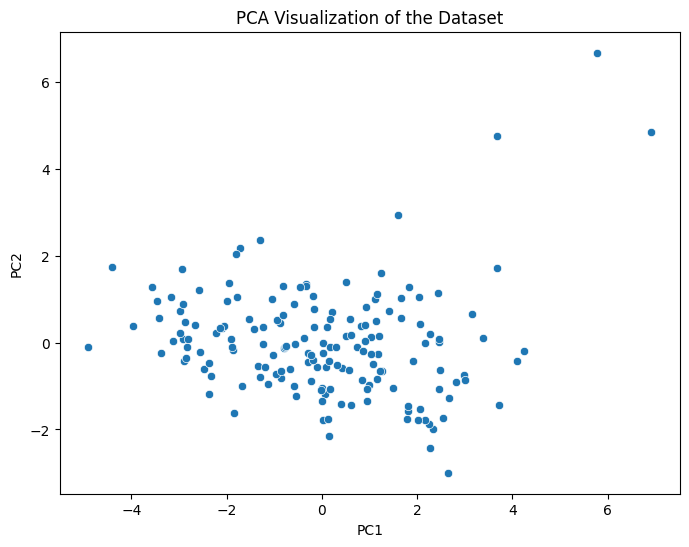

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
ds = pd.read_csv("../../_data/country.csv") # ggf. etwas anders als unser bisheriges Dataset
ds = ds.dropna()
X = ds.select_dtypes(include=[np.number])

X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title(f'PCA Visualization of the Dataset')
plt.show()

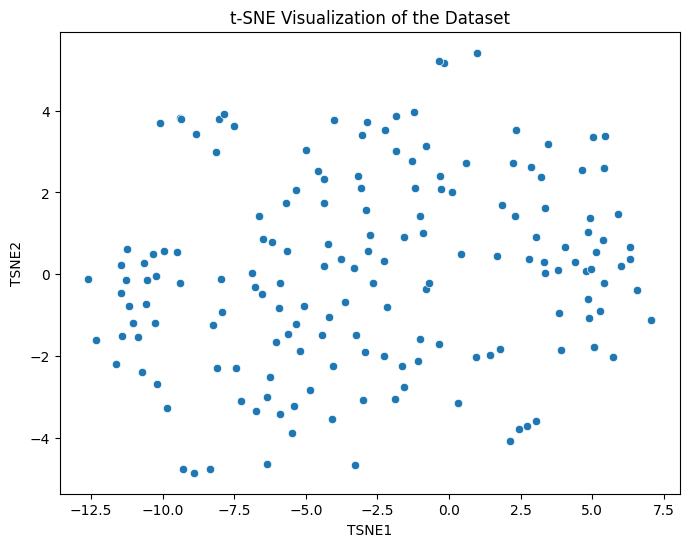

In [52]:
# Anwenden von t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=40) # Standard Wert für Perplexity ist 30
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df_tsne)
plt.title(f't-SNE Visualization of the Dataset')
plt.show()

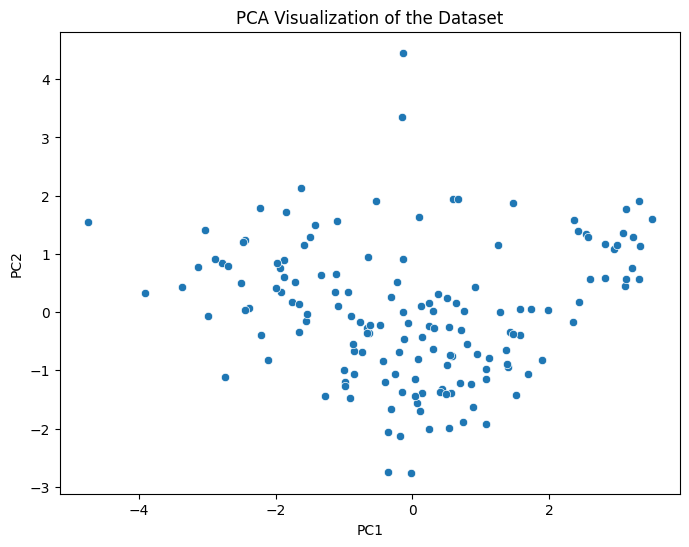

In [53]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
ds = pd.read_csv("../../_data/happiness_2017.csv") # ggf. etwas anders als unser bisheriges Dataset
ds = ds.dropna()
X = ds.select_dtypes(include=[np.number])

X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title(f'PCA Visualization of the Dataset')
plt.show()

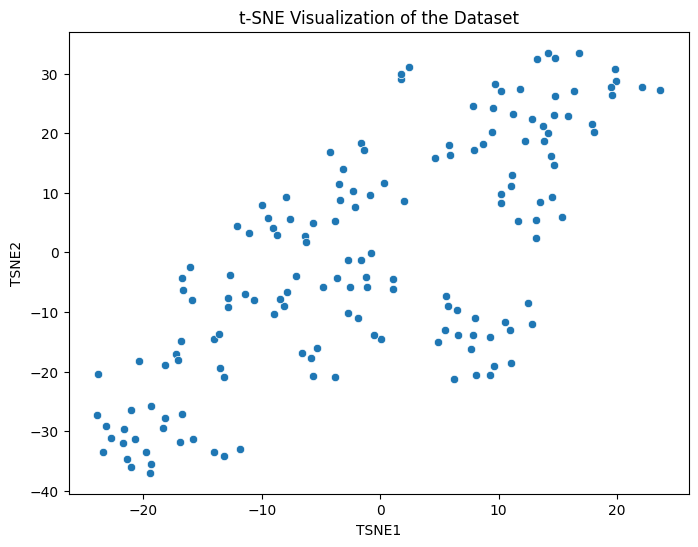

In [62]:
# Anwenden von t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10) # Standard Wert für Perplexity ist 30
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df_tsne)
plt.title(f't-SNE Visualization of the Dataset')
plt.show()